<a href="https://colab.research.google.com/github/Ciro125/Alura/blob/main/Deep_Learning_Previs%C3%A3o_com_Keras_(S%C3%A9ries_Temporais)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['font.size'] = 16

# Leitura dos dados

In [4]:
passageiros = pd.read_csv("/content/deeplearningprevisaocomkeras.txt")

In [5]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

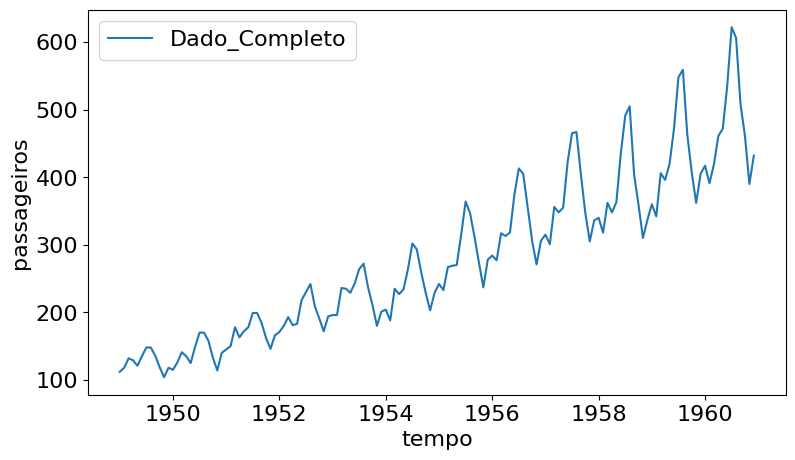

In [6]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="Dado_Completo")

# Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
sc.fit(passageiros)

StandardScaler()

In [10]:
dado_escalado = sc.transform(passageiros)

In [11]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

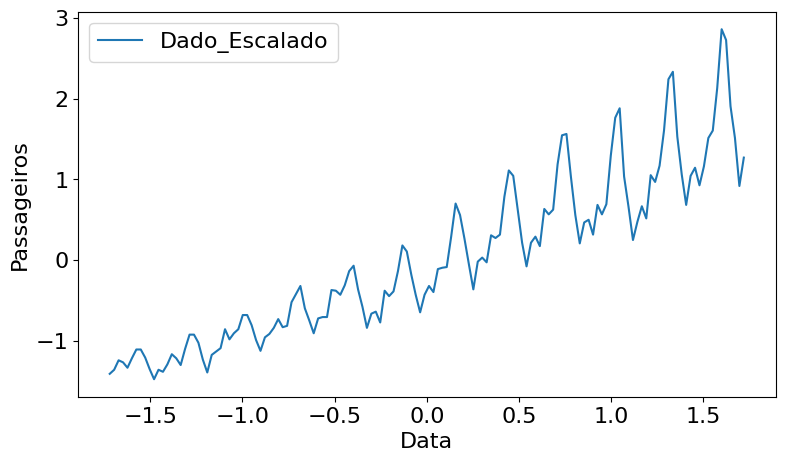

In [12]:
sns.lineplot(x=x,y=y,label="Dado_Escalado")
plt.ylabel("Passageiros")
plt.xlabel("Data")

# Train Test Split

In [13]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [14]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [15]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

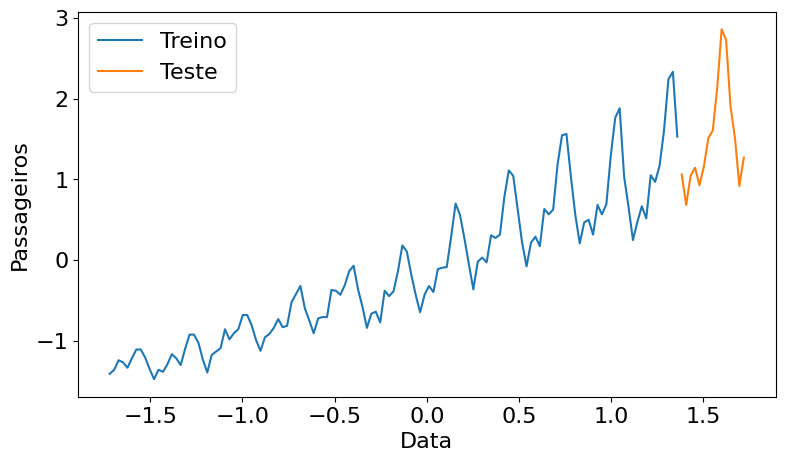

In [16]:
sns.lineplot(x=xtreino,y=ytreino,label="Treino")
sns.lineplot(x=xteste,y=yteste,label="Teste")
plt.ylabel("Passageiros")
plt.xlabel("Data")

# Regressão Linear - Utilizando o Keras

## Imports

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Criando a rede

In [18]:
regressor = Sequential()

## Adicionando camadas

In [19]:
regressor.add(Dense(1,input_dim=1,kernel_initializer="Ones",activation="linear",use_bias=False))

## Compilando o modelo

In [20]:
regressor.compile(loss="mean_squared_error",optimizer="adam")

In [21]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


## Treinando o Modelo

In [22]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 1s 4ms/step - loss: 0.1285


In [23]:
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

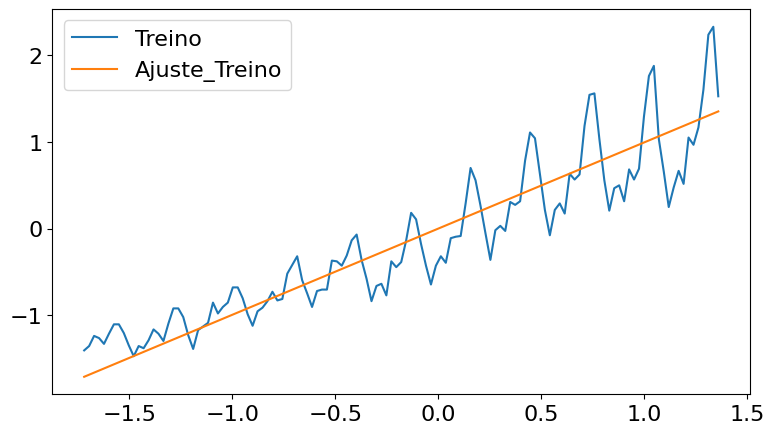

In [24]:
sns.lineplot(x=xtreino,y=ytreino,label="Treino")
sns.lineplot(x=xtreino,y=y_predict[:,0],label="Ajuste_Treino")

## Voltando para a escala original

In [25]:
d = {"tempo":xtreino,
     "passageiros:y_predict":y_predict[:,0]}

In [26]:
resultados = pd.DataFrame(data=d)

In [27]:
resultados

,tempo,passageiros:y_predict
0,-1.720064,-1.712692
1,-1.696007,-1.688739
2,-1.671950,-1.664785
3,-1.647894,-1.640831
4,-1.623837,-1.616877
...,...,...
124,1.262984,1.257571
125,1.287041,1.281525
126,1.311098,1.305479
127,1.335155,1.329433


In [28]:
resultados_transf = sc.inverse_transform(resultados)

In [29]:
resultados_transf = pd.DataFrame(resultados_transf)
resultados_transf.columns = ["tempo", "passageiros"]

In [30]:
resultados_transf

,tempo,passageiros
0,1949.000000,75.547864
1,1949.083333,78.411503
2,1949.166667,81.275157
3,1949.250000,84.138796
4,1949.333333,87.002463
...,...,...
124,1959.333333,430.640059
125,1959.416667,433.503727
126,1959.500000,436.367366
127,1959.583333,439.231005


<Axes: xlabel='tempo', ylabel='passageiros'>

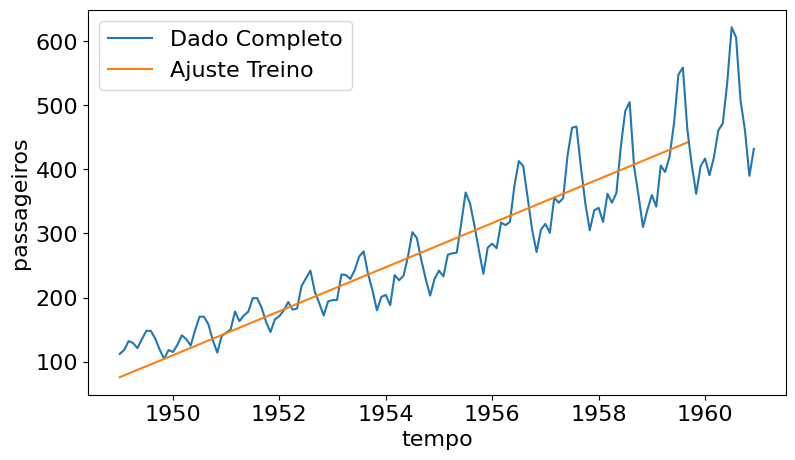

In [31]:
sns.lineplot(x="tempo",y="passageiros", data = passageiros, label="Dado Completo")
sns.lineplot(x="tempo", y="passageiros", data = resultados_transf, label="Ajuste Treino")

## Predict 

In [32]:
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 23ms/step


In [33]:
d = {"tempo":xteste,
     "passageiro": y_predict_teste[:,0]}

resultados_teste = pd.DataFrame(data=d)

In [34]:
resultados_transf_teste = sc.inverse_transform(resultados_teste)

In [35]:
resultados_transf_teste = pd.DataFrame(resultados_transf_teste)

In [36]:
resultados_transf_teste.columns = ["tempo", "passageiros"]

In [37]:
resultados_transf_teste

,tempo,passageiros
0,1959.750000,444.958297
1,1959.833333,447.821951
2,1959.916667,450.685590
3,1960.000000,453.549243
4,1960.083333,456.412896
5,1960.166667,459.276535
6,1960.250000,462.140189
7,1960.333333,465.003828
8,1960.416667,467.867467
9,1960.500000,470.731120


<Axes: xlabel='tempo', ylabel='passageiros'>

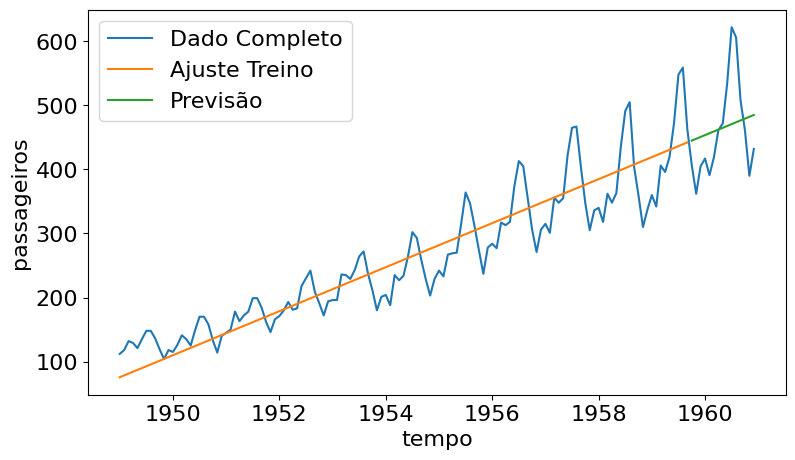

In [38]:
sns.lineplot(x="tempo",y="passageiros", data = passageiros, label="Dado Completo")
sns.lineplot(x="tempo", y="passageiros", data = resultados_transf, label="Ajuste Treino")
sns.lineplot(x="tempo", y="passageiros", data = resultados_transf_teste, label="Previsão")

# Aumentando a complexidade do modelo - Adicionando camadas a rede

In [39]:
regressor2 = Sequential()

In [40]:
regressor2.add(Dense(8,input_dim=1, kernel_initializer="random_uniform", activation="linear", use_bias=False))
regressor2.add(Dense(8, kernel_initializer="random_uniform", activation="linear", use_bias=False))
regressor2.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

In [41]:
regressor2.compile(loss="mean_squared_error", optimizer="adam")

In [42]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [43]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 0.8097
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8092
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8088
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8082
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8073
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8059
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8038
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8008
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7968
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7912
Epoch 11/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7835
Epoch 12/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7740
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

In [44]:
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


In [45]:
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 66ms/step


<Axes: >

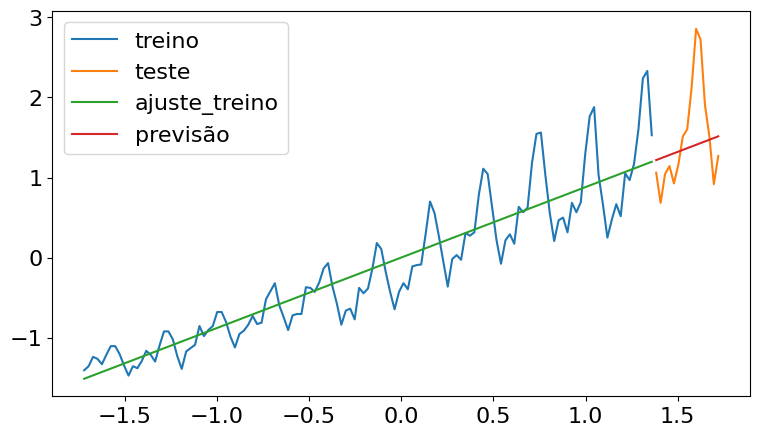

In [46]:
sns.lineplot(x=xtreino,y=ytreino, label="treino")
sns.lineplot(x=xteste,y=yteste, label="teste")
sns.lineplot(x=xtreino,y=y_predict[:,0], label="ajuste_treino")
sns.lineplot(x=xteste,y=y_predict_teste[:,0], label="previsão")

# Aumentando a complexidade do modelo - Mudando a função de ativação

In [47]:
regressor3 = Sequential()

In [48]:
regressor3.add(Dense(8,input_dim=1, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor3.add(Dense(8, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor3.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

In [49]:
regressor3.compile(loss="mean_squared_error", optimizer="adam")

In [50]:
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 8)                 64        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [51]:
regressor3.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8030
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7977
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7958
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7962
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7964
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7971
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7976
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7973
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7966
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7950
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7932
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7913
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [52]:
y_predict = regressor3.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


In [53]:
y_predict_teste = regressor3.predict(xteste)

1/1 [==============================] - 0s 45ms/step


<Axes: >

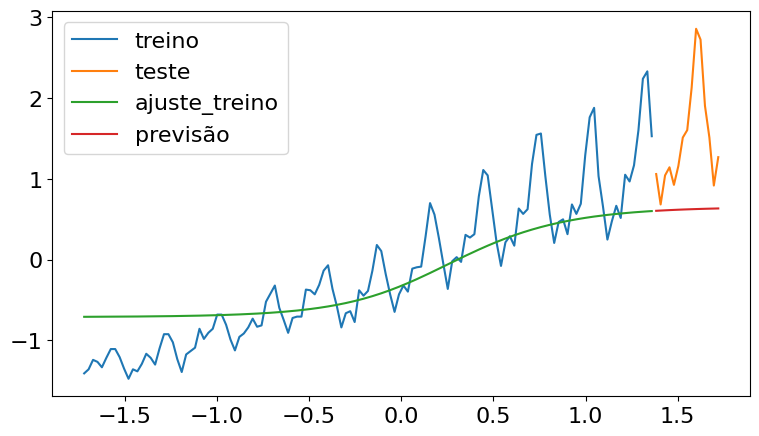

In [54]:
sns.lineplot(x=xtreino,y=ytreino, label="treino")
sns.lineplot(x=xteste,y=yteste, label="teste")
sns.lineplot(x=xtreino,y=y_predict[:,0], label="ajuste_treino")
sns.lineplot(x=xteste,y=y_predict_teste[:,0], label="previsão")

# Reformulando o problema
Vamos começar a passar os dados de passageiros para input na rede também.

In [55]:
vetor = pd.DataFrame(ytreino)[0]

### Função para separar os dados de passageiros 

In [56]:
def separa_dados(vetor, n_passos):
  x_novo, y_novo = [],[]

  for i in range (n_passos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos:i-1])),
    y_novo.append(vetor.loc[i])
  
  x_novo, y_novo = np.array(x_novo), np.array(y_novo),
  return x_novo, y_novo

In [57]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [58]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [59]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [60]:
vetor2 = pd.DataFrame(yteste)[0]

In [61]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

# Criar nova rede - Agora adicionando os dados de passageiros anteriores

In [62]:
regressor4 = Sequential()

In [63]:
regressor4.add(Dense(8,input_dim=1, kernel_initializer="ones", activation = "linear", use_bias=False))
regressor4.add(Dense(64, kernel_initializer="random_uniform", activation = "sigmoid", use_bias=False))
regressor4.add(Dense(1, kernel_initializer="random_uniform", activation = "linear", use_bias=False))

In [64]:
regressor4.compile(loss="mean_squared_error", optimizer="adam")

In [65]:
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 8         
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [66]:
regressor4.fit(xtreino_novo,ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.8027
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7554
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7278
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7046
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6858
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6624
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6412
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6125
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5836
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5530
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5232
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4888
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [67]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 [==============================] - 0s 4ms/step


<Axes: xlabel='tempo', ylabel='0'>

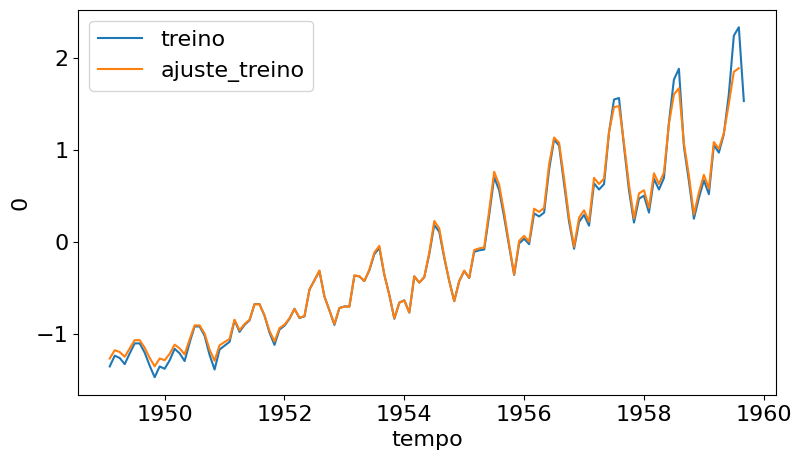

In [68]:
sns.lineplot(x="tempo",y=ytreino_novo, data = passageiros[1:129], label="treino")
sns.lineplot(x="tempo",y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129], label="ajuste_treino")

In [69]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 47ms/step


In [70]:
resultado=pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

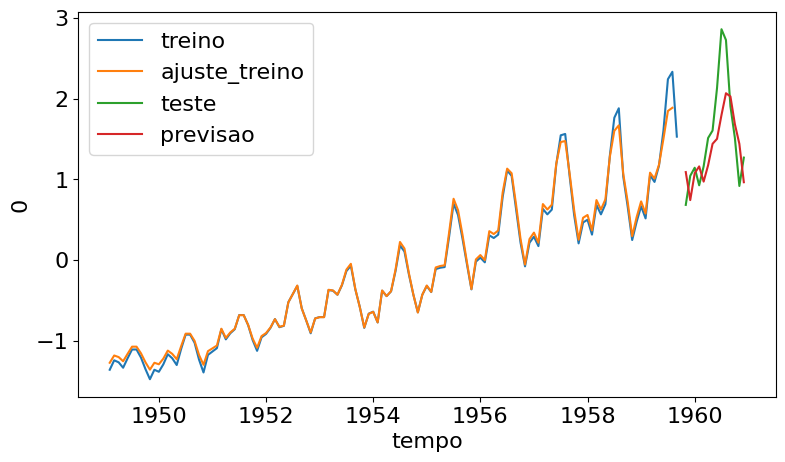

In [71]:
sns.lineplot(x="tempo",y=ytreino_novo, data = passageiros[1:129], label="treino")
sns.lineplot(x="tempo",y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129], label="ajuste_treino")
sns.lineplot(x="tempo",y=yteste_novo, data=passageiros[130:144], label="teste")
sns.lineplot(x="tempo",y=resultado.values, data=passageiros[130:144], label="previsao")

## Testando com diferentes N_passos da função.

In [72]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [73]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [74]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [75]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [76]:
regressor5 = Sequential()

In [77]:
regressor5.add(Dense(8,input_dim=4, kernel_initializer="ones", activation = "linear", use_bias=False))
regressor5.add(Dense(64, kernel_initializer="random_uniform", activation = "sigmoid", use_bias=False))
regressor5.add(Dense(1, kernel_initializer="random_uniform", activation = "linear", use_bias=False))

In [78]:
regressor5.compile(loss="mean_squared_error", optimizer="adam")

In [79]:
regressor5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 32        
                                                                 
 dense_11 (Dense)            (None, 64)                512       
                                                                 
 dense_12 (Dense)            (None, 1)                 64        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [80]:
regressor5.fit(xtreino_novo,ytreino_novo,epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7302
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6531
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5874
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5212
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4537
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3900
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3315
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2735
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2268
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1909
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1696
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1506
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [81]:
y_predict_novo = regressor5.predict(xtreino_novo)

4/4 [==============================] - 0s 3ms/step


In [82]:
y_predict_teste_novo = regressor5.predict(xteste_novo)

1/1 [==============================] - 0s 21ms/step


In [83]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [84]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

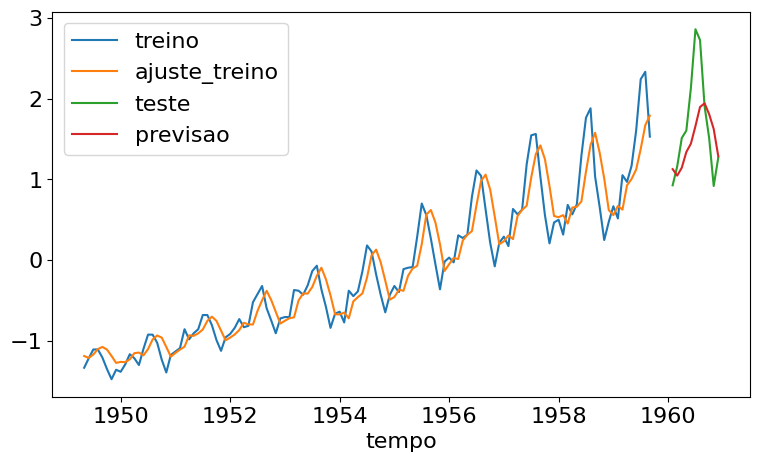

In [85]:
sns.lineplot(x="tempo", y=ytreino_novo, data = passageiros[4:129], label="treino")
sns.lineplot(x="tempo", y=resultado_treino.values, data=passageiros[4:129], label="ajuste_treino")
sns.lineplot(x="tempo", y=yteste_novo, data=passageiros[133:144], label="teste")
sns.lineplot(x="tempo", y=resultado.values, data=passageiros[133:144], label="previsao")

# Nova base de dados - Bicicleta

In [86]:
bike = pd.read_csv("bicicletas.csv")

In [87]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Ajustando as datas

In [88]:
bike["datas"] = pd.to_datetime(bike["datas"])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

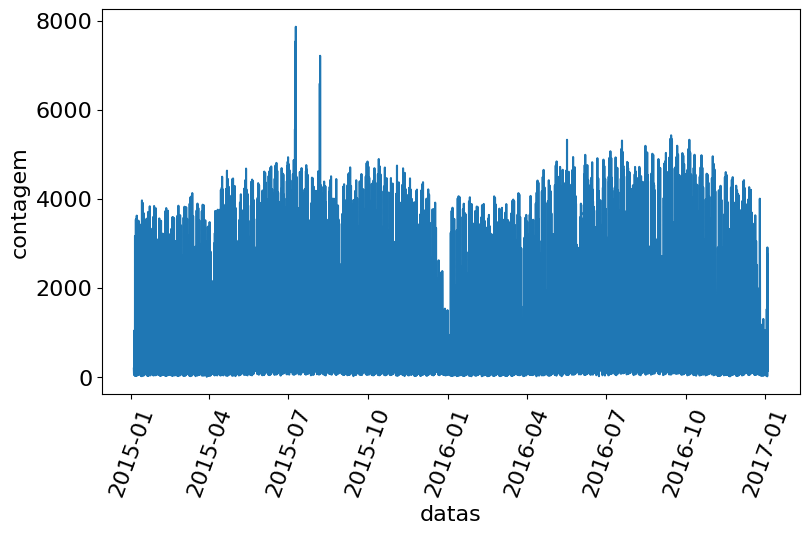

In [89]:
sns.lineplot(x="datas", y="contagem", data=bike)
plt.xticks(rotation=70)

# Escalonando os dados

A contagem de bicicletas serão usados tanto como entradas e saídas também.

In [90]:
sc2 = StandardScaler()

In [91]:
sc2.fit(bike["contagem"].values.reshape(-1,1))

StandardScaler()

In [92]:
y = sc2.transform(bike["contagem"].values.reshape(-1,1))

In [93]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [94]:
ytreino = y[0:tamanho_treino]

In [95]:
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

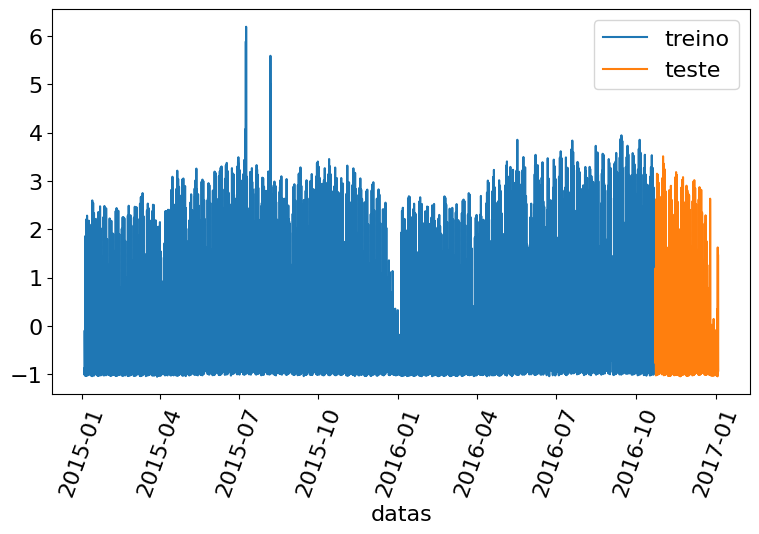

In [96]:
sns.lineplot(x="datas", y=ytreino[:,0], data=bike[0:tamanho_treino], label="treino")
sns.lineplot(x="datas", y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label="teste")
plt.xticks(rotation=70)

In [97]:
vetor = pd.DataFrame(ytreino)[0]

In [98]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [99]:
vetor2 = pd.DataFrame(yteste)[0]

In [100]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

# Redes Recorrentes

In [101]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [102]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [103]:
recorrente = Sequential()

In [104]:
from tensorflow.keras.layers import LSTM

In [105]:
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [106]:
recorrente.compile(loss="mean_squared_error", optimizer="RMSProp")

In [107]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [108]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,
                           validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 11s 19ms/step - loss: 0.2877 - val_loss: 0.0898
Epoch 2/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0853 - val_loss: 0.0477
Epoch 3/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0563 - val_loss: 0.0342
Epoch 4/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0481 - val_loss: 0.0332
Epoch 5/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0444 - val_loss: 0.0293
Epoch 6/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0414 - val_loss: 0.0280
Epoch 7/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0392 - val_loss: 0.0239
Epoch 8/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0378 - val_loss: 0.0274
Epoch 9/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0363 - val_loss: 0.0244
Epoch 10/100
490/490 [==============================] - 10s 20ms/step - loss: 

In [109]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 4s 8ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

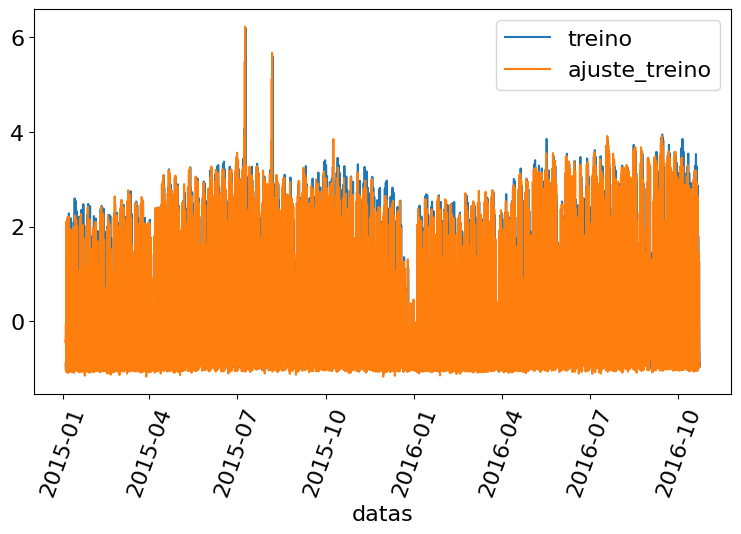

In [110]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

In [111]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 0s 6ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

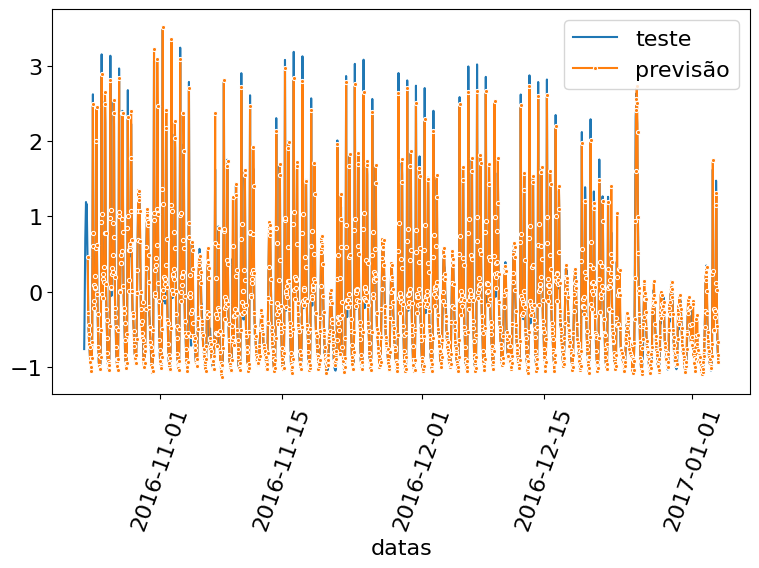

In [112]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

## Ultimo modelo, com rede GRU

In [113]:
from tensorflow.keras.layers import GRU

In [114]:
recorrente_g = Sequential()

In [115]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

In [116]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [117]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 10s 16ms/step - loss: 0.2389 - val_loss: 0.0602
Epoch 2/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0683 - val_loss: 0.0361
Epoch 3/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0512 - val_loss: 0.0383
Epoch 4/100
490/490 [==============================] - 8s 15ms/step - loss: 0.0448 - val_loss: 0.0306
Epoch 5/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0403 - val_loss: 0.0270
Epoch 6/100
490/490 [==============================] - 8s 15ms/step - loss: 0.0376 - val_loss: 0.0244
Epoch 7/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0359 - val_loss: 0.0232
Epoch 8/100
490/490 [==============================] - 8s 15ms/step - loss: 0.0346 - val_loss: 0.0203
Epoch 9/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0339 - val_loss: 0.0245
Epoch 10/100
490/490 [==============================] - 8s 15ms/step - loss: 0.03

In [118]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 5ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

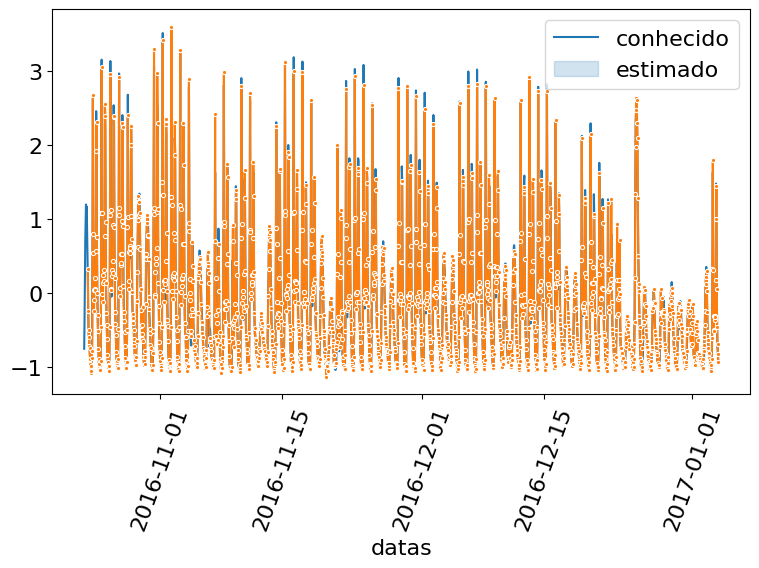

In [119]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

In [120]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


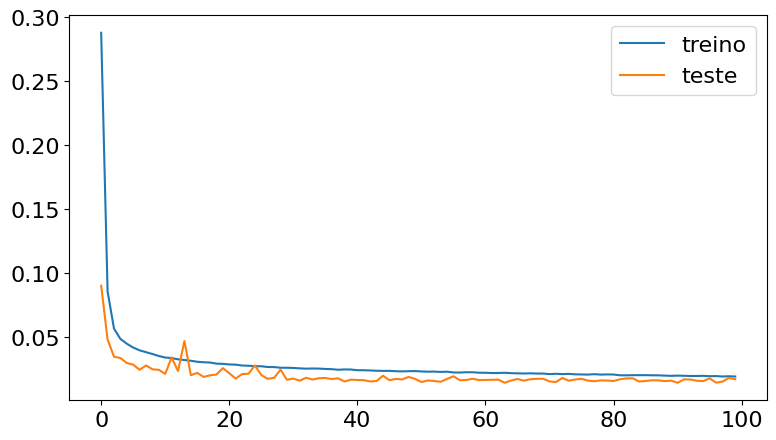

In [121]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

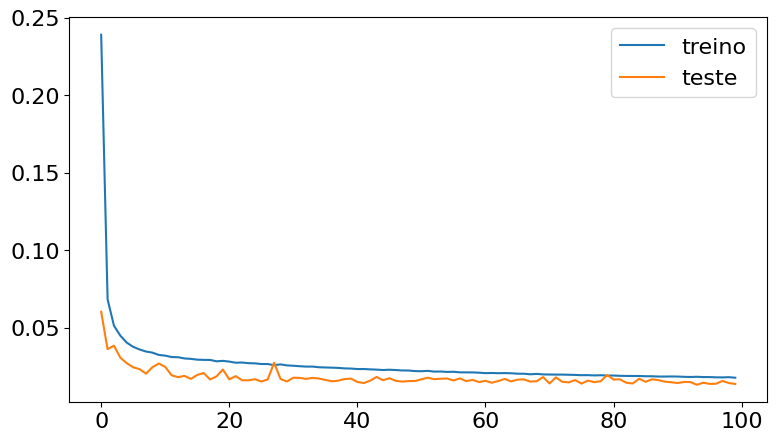

In [122]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
